# Handwritten Digit Recognition with TF 2.0
### Joshua Fagan M.S.
### 5/4/2019

## Introduction
Playing around with TF 2.0 and specifically Keras' CNN for MNIST handwritten digit recognition.

Following [Yassine Ghouzam's solution](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6) to the Kaggle MNIST challenge as a guide for honing my data prep pipeline.

In [1]:
# Data pre-processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras import layers

## Data Prep

### Load Data


In [2]:
test  = pd.read_csv( "./Data/test.csv" )
train = pd.read_csv( "./Data/train.csv" )

In [3]:
# Separate data into labels and features
test_feats   = test
train_feats  = train.drop( labels = ["label"], axis = 1 )
train_labels = train["label"]

# Free up space
#del train 
#del test

#### Visualize label space

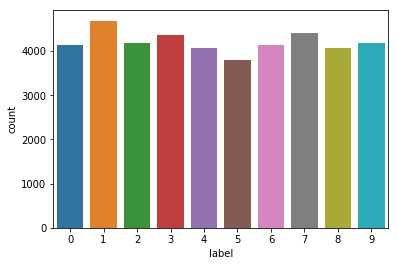

In [4]:
g = sns.countplot( train_labels )

### Test for Null and Missing Values

In [5]:
test_feats.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
train_feats.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### Normalize the Features
Normalize the pixel values to be between [0,1] instead of [0,255].

In [7]:
test_feats  = test_feats / 255
train_feats = train_feats / 255

### Reshape Images
Reshape the images, which are vectors currently, to be the shape Keras needs them to be (num_row, num_col, num_channels).

In [8]:
test_feats  = test_feats.values.reshape( -1, 28, 28, 1 )
train_feats = train_feats.values.reshape( -1, 28, 28, 1 )

#### Visualize Images

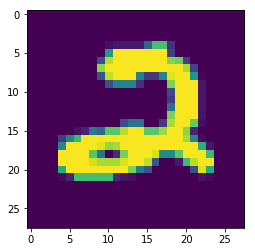

In [9]:
g = plt.imshow( test_feats[0][:,:,0] )

1

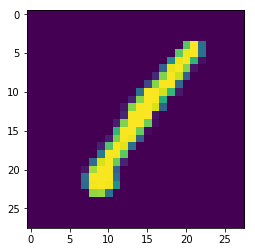

In [10]:
g = plt.imshow( train_feats[0][:,:,0] )
train_labels[0]

### Label Encoding
The training data labels are give as integers from 0-9. To remove bias from numberical weight we use one-hot encoding to convert labels to vectors of all zeros with a 1 at the class index e.g. label = 2 -> [0 0 1 0 0 0 0 0 0 0].

In [11]:
train_labels = to_categorical( train_labels, num_classes = 10 )

### Split Into Training and Validation Sets
Split the given training data into a 90-10 split for training and validation purposes.

In [12]:
# Random seed
random_seed = 4

train_feats, val_feats, train_labels, val_labels = train_test_split( train_feats,
                                                                     train_labels, 
                                                                     test_size = 0.1, 
                                                                     random_state=random_seed )

## CNN
We now create the Convolutional Neural Network that will be used to classify the images. 

### Define the Model
Here we define the structure of the CNN.

In [13]:
# Define type of model
model = keras.models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Standard feed forward, fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

### Compile and Train Model

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_feats, train_labels, epochs=5)

Epoch 1/5
34020/34020 [==============================] - 15s 429us/sample - loss: 0.1985 - accuracy: 0.9393
Epoch 2/5
34020/34020 [==============================] - 13s 378us/sample - loss: 0.0557 - accuracy: 0.9827
Epoch 3/5
34020/34020 [==============================] - 13s 372us/sample - loss: 0.0387 - accuracy: 0.9872
Epoch 4/5
34020/34020 [==============================] - 13s 379us/sample - loss: 0.0297 - accuracy: 0.9899
Epoch 5/5
34020/34020 [==============================] - 13s 379us/sample - loss: 0.0250 - accuracy: 0.9920
